# Augmented Dickey Fuller (ADF) Test for Stationarity

(Sourced from: https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

In ARIMA time series forecasting, the first step is to determine the number of differencing required to make the series stationary.

Since testing the stationarity of a time series is a frequently performed activity in autoregressive models, the ADF test along with KPSS test is something that you need to be fluent in when performing time series analysis.

Another point to remember is the ADF test is fundamentally a statistical significance test. That means, there is a hypothesis testing involved with a null and alternate hypothesis and as a result a test statistic is computed and p-values get reported.

It is from the test statistic and the p-value, you can make an inference as to whether a given series is stationary or not.

## Unit Root Tests

The ADF test belongs to a category of tests called ‘Unit Root Test’, which is the proper method for testing the stationarity of a time series.

Unit root is a characteristic of a time series that makes it non-stationary. Technically speaking, a unit root is said to exist in a time series of the value of alpha = 1 in the below equation.

$Y_{t} = \alpha Y_{t-1} + \beta X_{e} + \epsilon$

where, $Y_t$ is the value of the time series at time $t$ and $X_e$ is an exogenous variable (a separate explanatory variable, which is also a time series).

The presence of a unit root means the time series is non-stationary. Besides, the number of unit roots contained in the series corresponds to the number of differencing operations required to make the series stationary.

## The Dickey-Fuller Test (not augmented)

A Dickey-Fuller test is a unit root test that tests the null hypothesis that $\alpha = 1$ in the following model equation. $\alpha$ is the coefficient of the first lag on Y.

Null hypothesis: $H_{0} : \alpha=1$ i.e. series non-stationary

Alt.Hypothesis: $H_{0} : \alpha \neq 1$ i.e. series stationary

$y_{t} = c + \beta t + \alpha y_{t-1} + \phi \Delta Y_{t-1} + e_{t}$

where:
- $y(t-1) =$ lag 1 of time series
- $\Delta Y(t-1)=$ first difference of the series at time (t-1)

Fundamentally, it has a similar null hypothesis as the unit root test. That is, the coefficient of Y(t-1) is 1, implying the presence if a unit root.

**If the null hypothesis is failed to be rejected, the series is taken to be non-stationary.**

## Augmented Dickey-Fuller (ADF) Test

As the name suggest, the ADF test is an ‘augmented’ version of the Dickey Fuller test.

The ADF test expands the Dickey-Fuller test equation to include high order regressive process in the model.

$y_{t} = c + \beta t + \alpha y_{t-1} + \sum_{i=1}^{p}{\phi_{i} \Delta Y_{t-i}} + e_{t} $

If you notice, we have only added more differencing terms, while the rest of the equation remains the same. This adds more thoroughness to the test.

The null hypothesis however is still the same as the Dickey Fuller test.

A key point to remember here is: Since the null hypothesis assumes the presence of unit root (series non-stationary), that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.



## ADF Test in Python

(https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)

The `statsmodel` package provides a reliable implementation of the ADF test via the `adfuller()` function in `statsmodels.tsa.stattools`. It returns the following outputs:

- the p-value
- the value of the test statistic
- number of lags considered for the test
- the critical value cutoffs

**When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.**

The null hypothesis of the test is the presence of unit root, that is, the series is non-stationary.

Let’s run the ADF test on the a10 dataset from the fpp package from R. This dataset counts the total monthly scripts for pharmaceutical products falling under ATC code A10. The original source of this dataset is the Australian Health Insurance Commission.

An optional argument the `adfuller()` accepts is the number of lags you want to consider while performing the OLS regression.

By default, this value is `12*(nobs/100)^{1/4}`, where `nobs` is the number of observations in the series. But, optionally you can specify either the maximum number of lags with `maxlags` parameter or let the algorithm compute the optimal number iteratively.

This can be done by setting the `autolag='AIC'`. By doing so, the `adfuller` will choose a the number of lags that yields the lowest AIC. This is usually a good option to follow.

In [1]:
# import libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Non-stationary example

In [2]:
# load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
df = pd.read_csv(url, parse_dates=["date"], index_col="date")
series = df.loc[:, "value"].values
series

array([ 3.526591  ,  3.180891  ,  3.252221  ,  3.611003  ,  3.565869  ,
        4.306371  ,  5.088335  ,  2.81452   ,  2.985811  ,  3.20478   ,
        3.127578  ,  3.270523  ,  3.73785082,  3.55877609,  3.77720173,
        3.92449042,  4.38653092,  5.81054917,  6.19206769,  3.45085699,
        3.77230686,  3.7343029 ,  3.90539892,  4.04968714,  4.31556552,
        4.56218455,  4.60866203,  4.66785129,  5.09384145,  7.1799622 ,
        6.73147308,  3.84127758,  4.39407557,  4.07534073,  4.5406449 ,
        4.64561508,  4.75260653,  5.35060467,  5.20445484,  5.3016513 ,
        5.77374216,  6.20459348,  6.74948382,  4.21606735,  4.94934946,
        4.8230449 ,  5.19475419,  5.17078711,  5.25674157,  5.85527729,
        5.49072901,  6.11529323,  6.08847284,  7.41659792,  8.32945212,
        5.06979585,  5.26255667,  5.59712628,  6.110296  ,  5.68916084,
        6.48684933,  6.30056933,  6.46747574,  6.82862939,  6.64907826,
        8.60693721,  8.52447101,  5.27791837,  5.71430345,  6.21

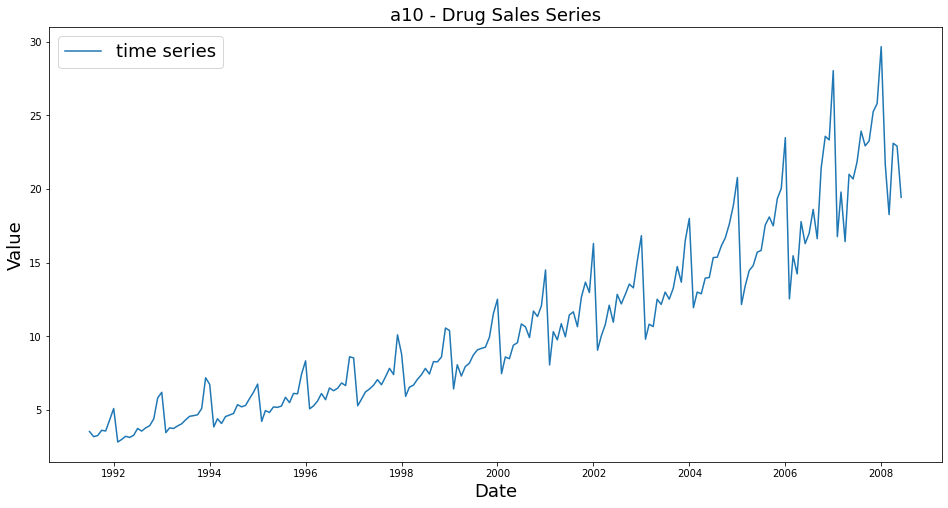

In [3]:
# plot data
plt.figure(figsize=(16,8))
plt.plot(df.index, df.loc[:, "value"], label="time series")
plt.title("a10 - Drug Sales Series", fontsize=18)
plt.legend(fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.show()

In [4]:
# ADF test 
result_adf = adfuller(series, autolag="AIC")

statistic = result_adf[0]
p_value = result_adf[1]
used_lag = result_adf[2]
nobs = result_adf[3]
critical_values = result_adf[4]
icbest = result_adf[5]

print(" > Is the data stationary ?")
print(f'ADF Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {used_lag}')
print('Critial Values:')

for key, value in critical_values.items():
    print(f'   {key}, {value}')  

print(f'\nResult: The series is likely {"not " if p_value > 0.05 else ""}stationary')

 > Is the data stationary ?
ADF Statistic: 3.145185689306741
p-value: 1.0
num lags: 15
Critial Values:
   1%, -3.465620397124192
   5%, -2.8770397560752436
   10%, -2.5750324547306476

Result: The series is likely not stationary


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

### Stationary example

In [5]:
# ADF test on stationary (random) time series
series = np.random.randn(100)
series

array([-2.4522373 ,  1.20894499, -1.27178112, -0.87194295, -0.676317  ,
        0.42530665,  1.02573672, -0.9718657 ,  0.49340602, -0.40945272,
        0.76376921, -0.07272506,  0.73038905, -0.25149841, -0.61879905,
        1.0843559 , -0.22732951, -2.40782209,  1.15241106, -0.44582133,
       -0.07275913,  1.7278166 ,  0.10323574,  1.14470541,  0.33779795,
        0.57410229,  0.32480706,  0.57375097,  0.51605798, -1.15430365,
        0.16810293, -0.26260211,  0.51480683, -0.69990562, -0.39470572,
       -0.48281097,  0.13547119, -0.55447769,  0.0899448 , -0.88957227,
        0.14189418, -0.56328037, -0.41402266, -0.70753665,  0.18718371,
        0.04113509,  0.80129636, -0.58977071, -1.96015684, -0.4091495 ,
        1.20164577, -3.61146202,  0.76529641, -0.9590641 ,  0.70955402,
       -0.33723782,  1.66992076, -0.06111269,  1.30048815, -0.23387555,
        1.55310439, -1.48484807,  1.18585775,  0.79072861,  1.61724554,
       -0.84259086, -1.21320164, -0.90324925,  1.44814997,  0.74

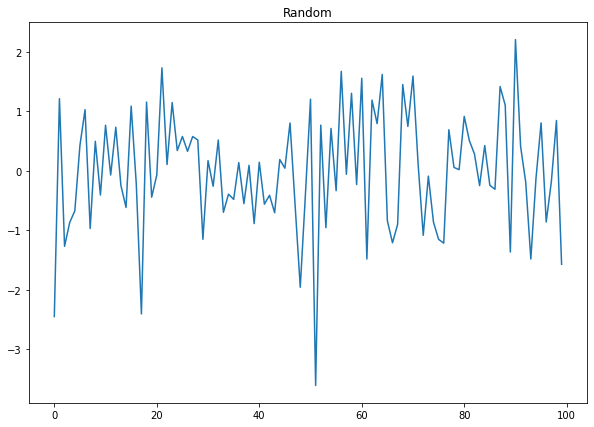

In [6]:
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(series);
plt.title('Random');

In [7]:
# ADF test 
result_adf = adfuller(series, autolag="AIC")

statistic = result_adf[0]
p_value = result_adf[1]
used_lag = result_adf[2]
nobs = result_adf[3]
critical_values = result_adf[4]
icbest = result_adf[5]

print(" > Is the data stationary ?")
print(f'ADF Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {used_lag}')
print('Critial Values:')

for key, value in critical_values.items():
    print(f'   {key}, {value}')  

print(f'\nResult: The series is likely {"not " if p_value > 0.05 else ""}stationary')

 > Is the data stationary ?
ADF Statistic: -12.236862712273409
p-value: 1.0234409105152906e-22
num lags: 0
Critial Values:
   1%, -3.498198082189098
   5%, -2.891208211860468
   10%, -2.5825959973472097

Result: The series is likely stationary


The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.